# Lab 2 - Pichu or Pikachu?

## Opening and Cleaning the Datasets

- In this lab I will create two different models to identify if a Pokémon is a Pichu or a Pikachu, based on its' width and height.
- I start with creating a function to clean the dataset (the Pichu and the Pikachu datasets have the same format).
- After that I will open the datasets and clean them using the clean_text function.

In [24]:
import matplotlib.pyplot as plt
import random as rnd
from math import sqrt

In [88]:
def clean_text(pokemon_file, pokemontype):
    '''The function takes a textfile and the pokemontype (as a string) as parameters.
    (The textfile must have the following heading: (width (cm), height (cm)).
    Each line should look similar to: (20.11541438766307, 28.701809671168824).)
    The function returns a list of lists, where each of the inner lists consist of two float values,
    where the first value is the width and the second value is the height.'''
    pokemon_size = [pokemon.strip("\n") for pokemon in pokemon_file.readlines()] #readlines reads each line in the textfile and stores each line as a string element in a list. strip("\n") removes "\n" (that automatically gets added when running readlines) for each line. 
    pokemon_size.remove("(width (cm), height (cm))") #Removes the heading
    pokemon_size = [pokemon.replace("(","").replace(")", "") for pokemon in pokemon_size] #For each element, replace the left and right paranthesis with an empty string "" (i.e. remove it).
    pokemon_size = [pokemon.split(",") for pokemon in pokemon_size] #split(",") creates inner lists of the strings in the larger list (separated at comma). Each inner list contains the values width and height. 
    pokemon_size = [[float(pokemon[0]), float(pokemon[1]), pokemontype] for pokemon in pokemon_size] #Changes the first (width) and the second (height) elements in each inner list in pokemon_size to floats and adds information about the type of Pokémon.  
    return pokemon_size

In [89]:
with open("pichu.txt", "r") as pichu, open("pikachu.txt", "r") as pikachu:
    #Reading, cleaning and joining together the datasets
    pichu_size = clean_text(pichu, "pichu")
    pikachu_size = clean_text(pikachu, "pikachu") 
    pokemons = pichu_size + pikachu_size

    #Creates the variables width and height for Pichu and Pikachu, by calling the first and second elements. 
    #These variables will only be used when plotting the data
    pichu_width = [pichu[0] for pichu in pichu_size] 
    pichu_height = [pichu[1] for pichu in pichu_size] 
    pikachu_width = [pikachu[0] for pikachu in pikachu_size] 
    pikachu_height = [pikachu[1] for pikachu in pikachu_size]

## Plotting the Data
- I will use matplotlib to plot the data.
- Studying the scatterplot, I can see that the Pichu and Pikachu datapoints are separated from each other on the y-axis (height), but that they overlap on the x-axis (width).

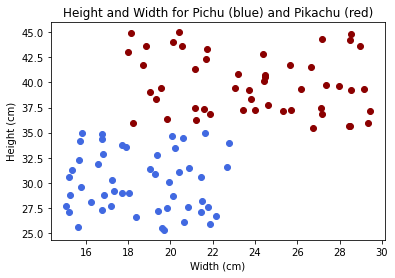

In [90]:
plt.scatter(pichu_width, pichu_height, c="royalblue") #Plots the values for Pichu and changes the colour
plt.scatter(pikachu_width, pikachu_height, c="darkred") #Plots the values for Pikachu and changes the colour
plt.ylabel("Height (cm)")
plt.xlabel("Width (cm)")
_ = plt.title("Height and Width for Pichu (blue) and Pikachu (red)") #Assigning the title to a variable disables the output. https://stackoverflow.com/questions/12056115/disable-the-output-of-matplotlib-pyplot

## Opening and Cleaning the Test Data
- The testdata consist of four testpoints ((25, 35), (15,14), (26,30), (22,45)).
- The testdata has a different file structure and can therefore not be cleaned with the clean_text function.

In [91]:
with open("test_points.txt", "r") as test:
    test_points = test.readlines() #readlines reads the line in the textfile and stores it as a string element in a list.
    test_points = test_points[0].split(")") #Splits the only element (element 0) in the list at closing paranthesis.
    test_points = [point.replace(", (", "").replace("(", "") for point in test_points] #replace(", (", "") replaces comma-space-open_paranthesis with an empty string and replace("(", "") replaces a single paranthesis with an empty space.
    test_points = [point.split(",") for point in test_points] #split(",") creates inner lists out of all the string elements in the larger list (splitted at comma). Each inner list contains the values width and height. 
    test_points.pop(4) #pop(4) removes the fifth element in the list of lists, which is an empty element.
    test_points = [[float(point[0]), float(point[1])] for point in test_points] #Changes the first (width) and the second (height) elements in each inner list in test_points to floats.  
    print(test_points)

[[25.0, 35.0], [15.0, 14.0], [26.0, 30.0], [22.0, 45.0]]


## Creates Euclidean Distance Function

- I create a euclidean distance function, which can be used to calculate the distance between two points (the test point and a point in the dataset).

In [92]:
def eucl_dist(x1, y1, x2, y2):
    '''The function takes the coordinates (x, y) of two points as input.
    The function returns the euclidean distance between the points.'''
    return sqrt((x2 - x1)**2 + (y2-y1)**2)

## Creating a Function for Testing if a Pokémon is a Pichu or a Pikachu
- This function is based on the point that is closest to the test point.

In [105]:
def pichu_or_pikachu_closest(test_point, dataset):
    '''The function takes a point (stored in a list consisting of the x (width) and y (height)-coordinates) and a dataset as parameters.
    The function checks the type of Pokémon, which is closest to the test point given as an argument.
    Based on the closest point, the function classifies the test point as a Pichu or a Pikachu.'''
    distances = [[eucl_dist(test_point[0], test_point[1], point[0], point[1]), point[2]] for point in dataset] #Creates a list of list, where each inner list contains the euclidean distance and the type of Pokémon.
    distances.sort() #Sort the list of distances, so that the lowest value (i.e. closest point) is the first element in the list.
    if distances[0][1] == "pichu": #If the first element in the list is Pichu. 
        print(f"Sample with (width, height): ({test_point[0]:.1f}, {test_point[1]:.1f}) classified as Pichu.")
    else:
        print(f"Sample with (width, height): ({test_point[0]:.1f}, {test_point[1]:.1f}) classified as Pikachu.")

## Classifying the Test Points (based on the closest point)

In [106]:
#Loops through the list of lists of test points and classifies each point as either Pichu or Pikachu.
for point in test_points:
    pichu_or_pikachu_closest(point, pokemons)

Sample with (width, height): (25.0, 35.0) classified as Pikachu.
Sample with (width, height): (15.0, 14.0) classified as Pichu.
Sample with (width, height): (26.0, 30.0) classified as Pichu.
Sample with (width, height): (22.0, 45.0) classified as Pikachu.


## Making a Program Where the User Can Input a Test Point

In [107]:
#Run the following loop until the user input is correct; then print the feedback and break the loop.
while True:
    width = input("Please enter the width of the Pokémon.")
    height = input("Please enter the height of the Pokémon.")
    try: 
        #Fixes some common input errors, so that the user does not have to enter the values again.
        #It removes empty spaces from the inputed values.
        #If the value has decimals separated with a comma, change it into a decimal separator (then make it into a float).§
        width = float(".".join(width.strip().split(","))) 
        height = float(".".join(height.strip().split(",")))

        #The following code takes care of negative numbers
        if width < 0: 
            raise ValueError("The width has to be larger than 0.")
        elif height < 0:
            raise ValueError("The height has to be larger than 0.")
        
        #Creates a list of the width and height and runs the function for classifying if the Pokémon is a Pichu or a Pikachu.
        size_as_list = [width, height]
        pichu_or_pikachu_closest(size_as_list, pokemons)
        break
       
    except ValueError as err:
        print(err)
        print("Please make sure that you only enter numerical values.") 

Sample with (width, height): (34.0, 45.5) classified as Pikachu.


## Creating a Second Function for Classifying if a Pokémon is a Pichu or a Pikachu
- This function is based on the five closest points to the test point.
- If the majority of the five closest points are Pichus the test point will be classified as a Pichu.
- If the majority of the five closest points are Pikachus the test point will be classified as a Pikachu.

In [250]:
def pichu_or_pikachu_five_closest(test_point, dataset):
    '''The function takes a point (stored in a list consisting of the x (width) and y (height)-coordinates) and a dataset as parameters.
    The first item should be the width and the second should be the height.
    The function checks the types of Pokémons at the five closest points.
    Based on the most common type of Pokémon, it classifies the test point as a Pichu or a Pikachu.'''
    distances = [[eucl_dist(test_point[0], test_point[1], point[0], point[1]), point[2]] for point in dataset] #Creates a list of list, where each inner list contains the euclidean distance and the type of Pokémon.
    distances.sort() #Sort the list of distances, so that the lowest value (i.e. closest point) is the first element in the list.
    
    pichuPikachu = [pokemon[1] for pokemon in distances[0:5]] #Adds the type of Pokémon, for the five lowest values, to a list.
    pichu_count = pichuPikachu.count("pichu") #Counts the number of Pichus at the five closest points.
    pikachu_count = pichuPikachu.count("pikachu") #Counts the number of Pikachus at the five closest points.

    if pichu_count > pikachu_count: #If there are more Pichus than Pikachus around the test point.
        print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) classified as Pichu.")
        return "pichu"
    else:
        print(f"Sample with (width, height): ({test_point[0]:.0f}, {test_point[1]:.0f}) classified as Pikachu.")
        return "pikachu"

## Classifying the Test Points (based on the five closest points)

In [252]:
#Loops through the list of lists of test points and classifies each point as either Pichu or Pikachu.
for point in test_points:
    pichu_or_pikachu_five_closest(point, pokemons)

Sample with (width, height): (25, 35) classified as Pikachu.
Sample with (width, height): (15, 14) classified as Pichu.
Sample with (width, height): (26, 30) classified as Pichu.
Sample with (width, height): (22, 45) classified as Pikachu.


## Creating a Function for Creating Test and Training Datasets

In [111]:
def random_data(dataset, size_testing):
    '''The function takes a dataset and the wanted size of the testing data as parameters.
    The function returns a random set of training data and test data (the data not used for training will be the test data).'''
    training_index = rnd.sample(range(len(dataset)), size_testing) #Creates a sample with unique numbers between 0 and one less than the elements in the dataset. It picks out the required amount of these and stores them in a variable. 
    training = [(dataset[index]) for index in training_index] #Picks out elements in the dataset (based on the previous generated random numbers) and stores them in a new variable. 

    testing_index = [number for number in range(len(dataset)) if number not in training_index] #Loops through the numbers in the specified range and if it is not a part of the training_index stores it in a new variable. 
    testing = [(dataset[index]) for index in testing_index] #Stores the elements that are not part of the training data in a new dataset.
    
    return training, testing

## Creating Test and Training Datasets and Running the Closest Point Function

In [249]:
#Creating the test and training datasets
pichu_training, pichu_testing = random_data(pichu_size, 45)
pikachu_training, pikachu_testing = random_data(pikachu_size, 45)

#Create two lists; one with the training data and one with the testing data
pokemon_training = pichu_training + pikachu_training
pokemon_testing = pichu_testing + pikachu_testing

for pokemon in pokemon_testing:
    pichu_or_pikachu_closest([pokemon[0], pokemon[1]], pokemon_training)

Sample with (width, height): (17.2, 27.7) classified as Pichu.
Sample with (width, height): (20.9, 31.5) classified as Pichu.
Sample with (width, height): (20.4, 31.1) classified as Pichu.
Sample with (width, height): (16.8, 27.3) classified as Pichu.
Sample with (width, height): (19.4, 27.2) classified as Pichu.
Sample with (width, height): (18.1, 45.0) classified as Pikachu.
Sample with (width, height): (24.4, 40.2) classified as Pikachu.
Sample with (width, height): (18.2, 36.0) classified as Pikachu.
Sample with (width, height): (28.5, 39.2) classified as Pikachu.
Sample with (width, height): (21.7, 43.4) classified as Pikachu.


## Creating Test and Training Datasets and Running the Five Closest Point Function

In [259]:
#Creating the test and training datasets
pichu_training, pichu_testing = random_data(pichu_size, 45)
pikachu_training, pikachu_testing = random_data(pikachu_size, 45)

#Create two lists; one with the training data and one with the testing data
pokemon_training = pichu_training + pikachu_training
pokemon_testing = pichu_testing + pikachu_testing

correct_pichu = []
correct_pikachu = []
for pokemon in pokemon_testing:
    pokemon_type = pichu_or_pikachu_five_closest([pokemon[0], pokemon[1]], pokemon_training)
    if pokemon_type == "pichu":
        if pokemon[2] == pokemon_type:
            correct_pichu.append(True)
        else:
            correct_pichu.append(False)
    else:
        if pokemon[2] == pokemon_type:
            correct_pikachu.append(True)
        else: 
            correct_pikachu.append(False)

tp = correct_pikachu.count(True)
tn = correct_pikachu.count(True)
fp = correct_pikachu.count(False)
fn = correct_pikachu.count(False) 

accuracy_percent = (tp + tn)/(tp + tn + fp + fn)*100

print(f"The test data was classified correctly in {accuracy_percent}% of the cases.")


Sample with (width, height): (21, 31) classified as Pichu.
Sample with (width, height): (18, 27) classified as Pichu.
Sample with (width, height): (20, 33) classified as Pichu.
Sample with (width, height): (23, 32) classified as Pichu.
Sample with (width, height): (20, 35) classified as Pichu.
Sample with (width, height): (26, 37) classified as Pikachu.
Sample with (width, height): (20, 44) classified as Pikachu.
Sample with (width, height): (18, 43) classified as Pikachu.
Sample with (width, height): (19, 42) classified as Pikachu.
Sample with (width, height): (27, 37) classified as Pikachu.
The test data was classified correctly in 100.0% of the cases.
